# 1. Load and explore the dataset to understand its structure

In [ ]:
import pandas as pd
df = pd.read_csv('MoMTSim_20240722202413_1000_dataset.csv')


print(df.head())

# Display dataset info
print(df.info())

# Check basic statistics
print(df.describe())


   step transactionType  amount         initiator  oldBalInitiator  \
0     0         PAYMENT  579.16  4018807983755588            29.32   
1     0        TRANSFER   39.03  4610593854752035            39.03   
2     0        TRANSFER   21.78  4840578447365454            21.78   
3     0         PAYMENT  570.22  4958066799829630             5.29   
4     0         PAYMENT  574.80  4149196095918843            82.63   

   newBalInitiator         recipient  oldBalRecipient  newBalRecipient  \
0            29.32        30-0000345             0.00             0.00   
1             0.00  4944921135715488            55.94            94.98   
2             0.00  4305579785620656            58.09            79.88   
3             5.29        00-0000388             0.00             0.00   
4            82.63        80-0005320             0.00             0.00   

   isFraud  
0        0  
1        1  
2        1  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422595

# 2. Identify and Handle Missing Values


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64


In [ ]:
# NO MISSING VALUES IN THIS DATASET
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates:\n", duplicates)
# remove duplicates
df.drop_duplicates(inplace=True)



Duplicates:
 20


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates:\n", duplicates)

Duplicates:
 0


# 3. Analyze the Distribution of Features and Target Classes

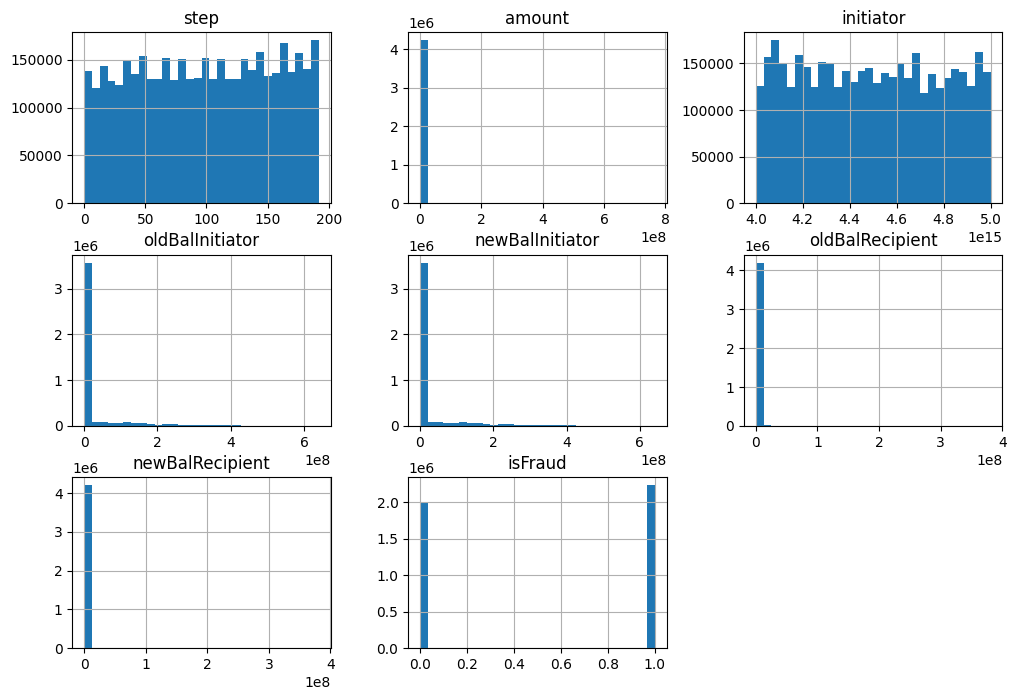

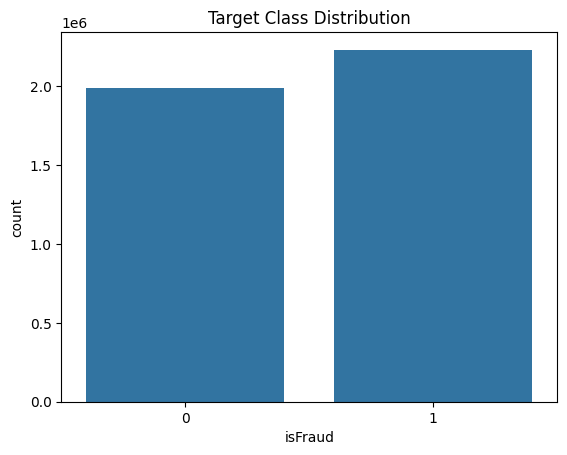

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()

# Plot target class distribution
sns.countplot(x="isFraud", data=df)
plt.title("Target Class Distribution")
plt.show()


# 4 & 5. Identify Potential Outliers Using Boxplot

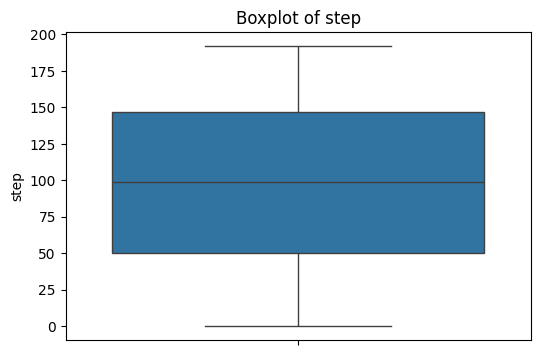

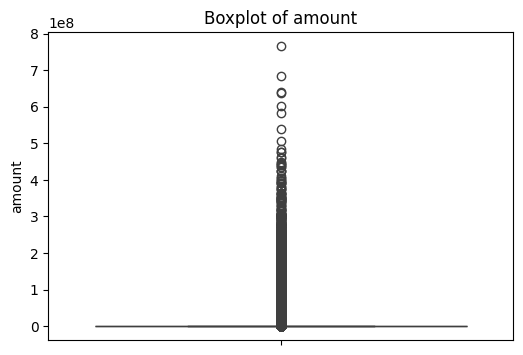

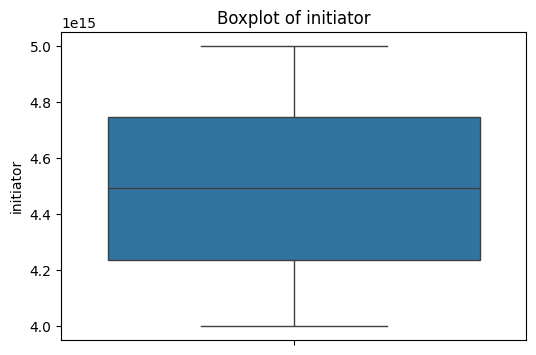

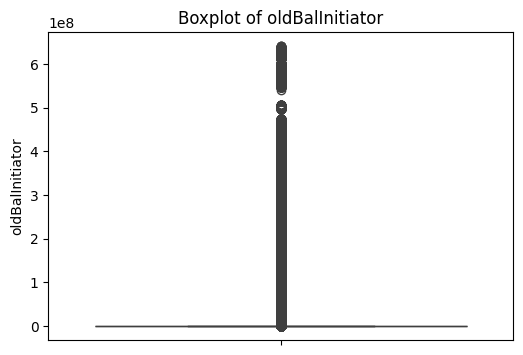

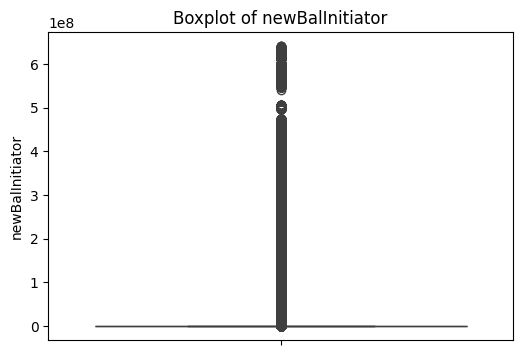

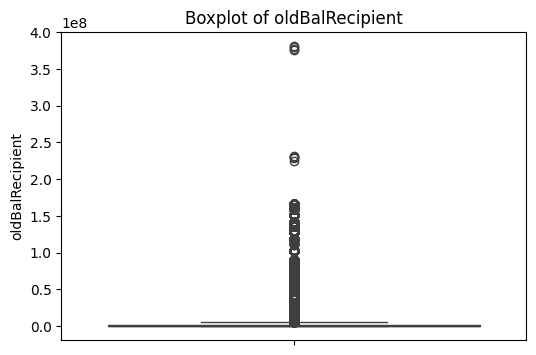

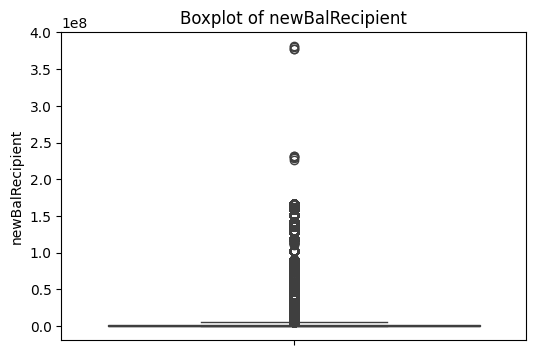

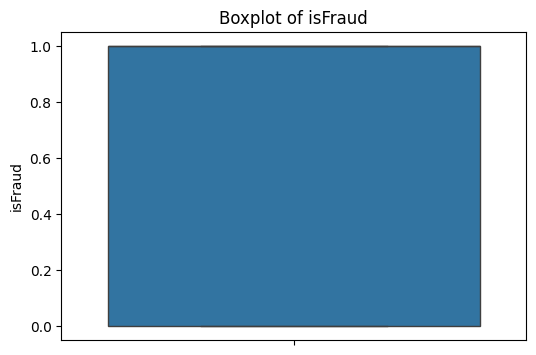

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Create separate boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


# 6. Detect Outliers Using IQR (Interquartile Range) Method

In [ ]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition (only for numeric columns)
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers per feature
print(outliers)


step                     0
amount              370472
initiator                0
oldBalInitiator     898750
newBalInitiator    1004917
oldBalRecipient     357952
newBalRecipient     348783
isFraud                  0
dtype: int64


# 7. Visualize outliers using boxplots across different target classes

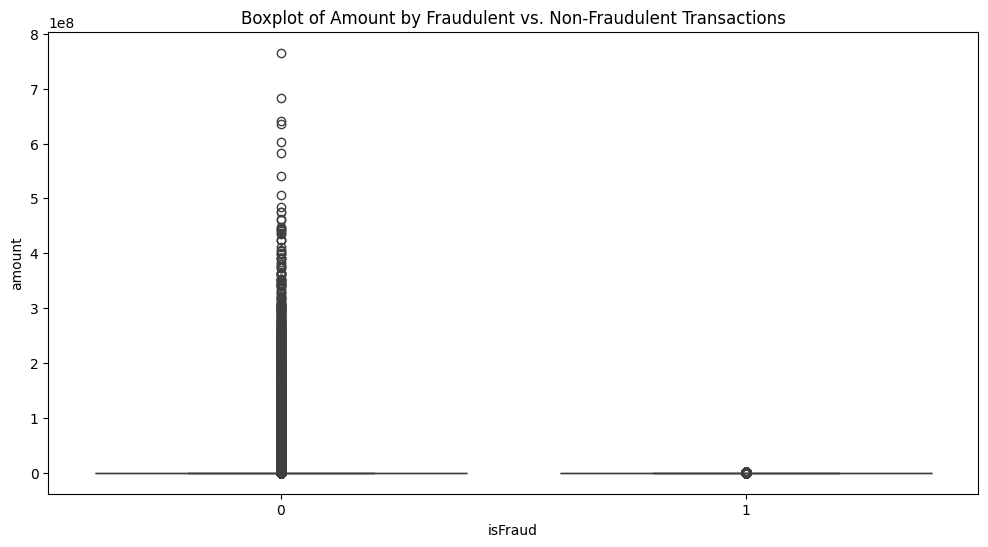

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.title("Boxplot of Amount by Fraudulent vs. Non-Fraudulent Transactions")
plt.show()


# 8. Compare results with at least one other outlier detection method (e.g., Z-score)

In [ ]:
from scipy import stats

# Compute Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outliers_z = (abs(z_scores) > 3).sum()

# Display the number of outliers per feature
print(outliers_z)


step                    0
amount                876
initiator               0
oldBalInitiator    134166
newBalInitiator    134150
oldBalRecipient     22757
newBalRecipient     22785
isFraud                 0
dtype: int64


# 9. Propose and implement a strategy for handling the detected outliers

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute the IQR for numeric features
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition only on numeric data
outlier_condition = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers from the original dataframe
df_no_outliers = df[~outlier_condition]

# Display dataset shape before and after outlier removal
print("Original dataset shape:", df.shape)
print("Dataset shape after outlier removal:", df_no_outliers.shape)


Original dataset shape: (4225938, 10)
Dataset shape after outlier removal: (2622515, 10)


# 10. Visualize relationships between features and target classes (minimum 3 different visualization types)


Scatter Plot (Amount vs. Old Balance Initiator)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


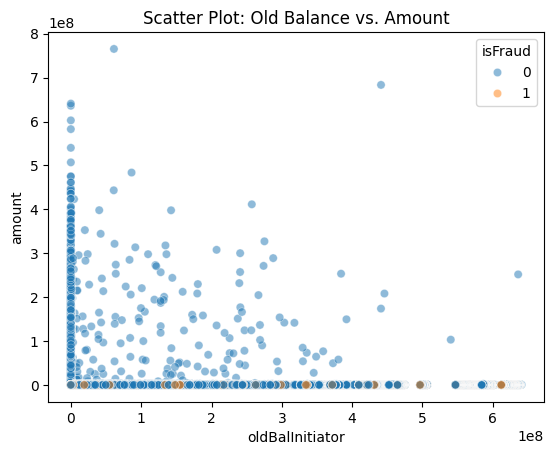

In [ ]:
sns.scatterplot(x="oldBalInitiator", y="amount", hue="isFraud", data=df, alpha=0.5)
plt.title("Scatter Plot: Old Balance vs. Amount")
plt.show()


Pairplot (Sampled for efficiency)

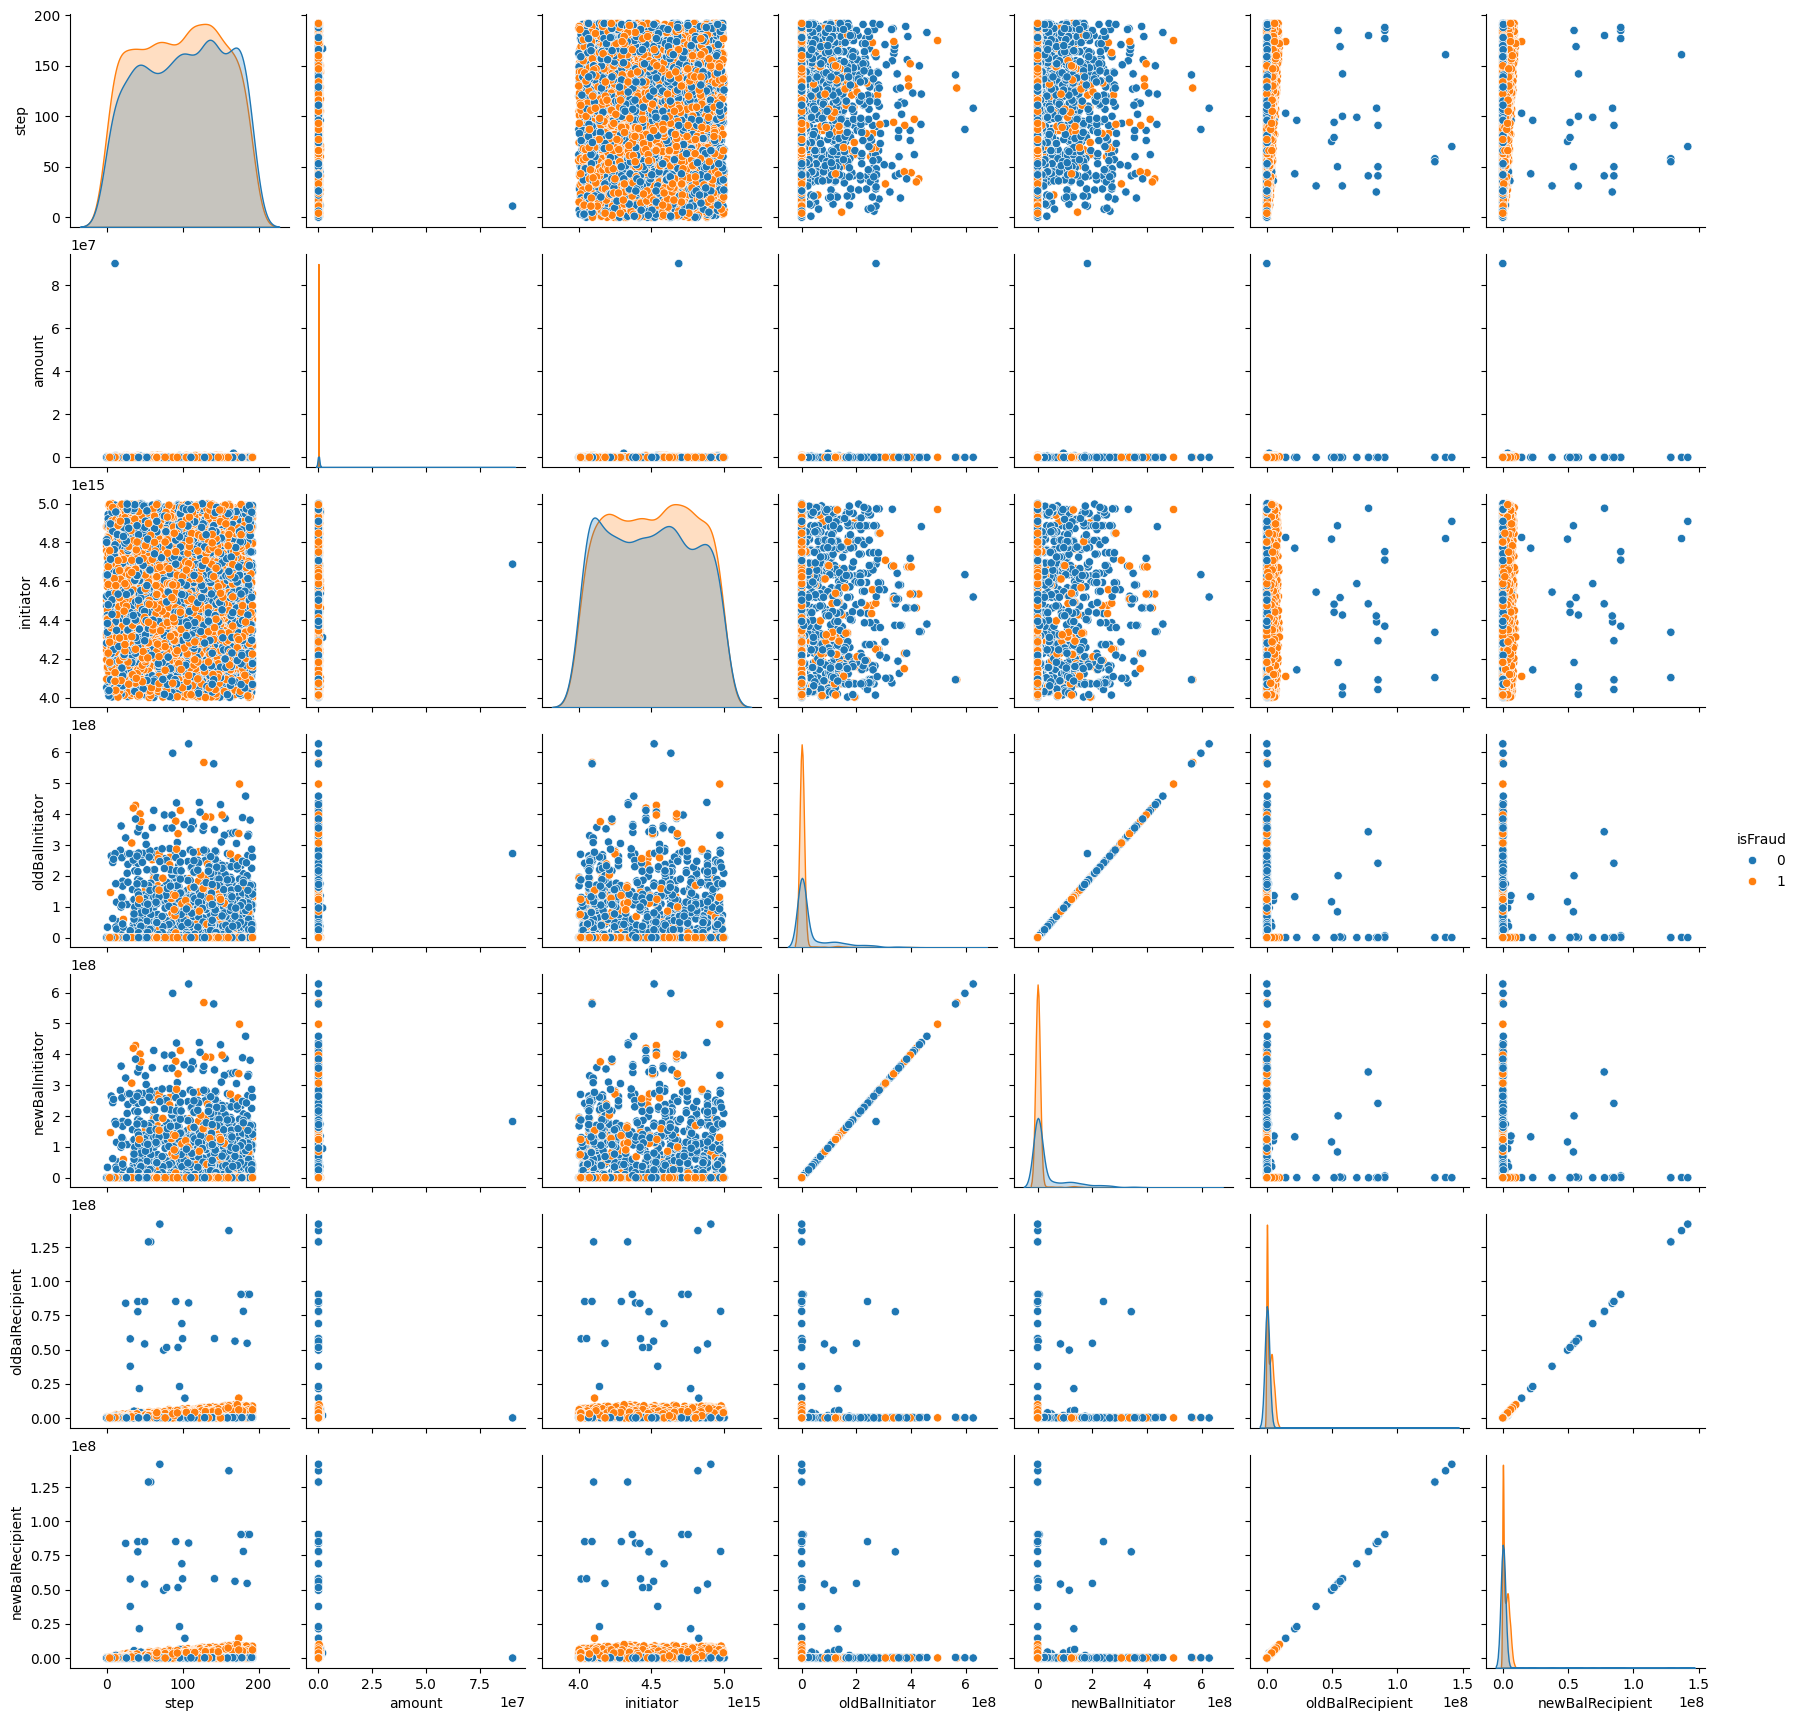

In [ ]:
sns.pairplot(df.sample(5000), hue="isFraud", diag_kind="kde")
plt.show()


Heatmap of feature correlations

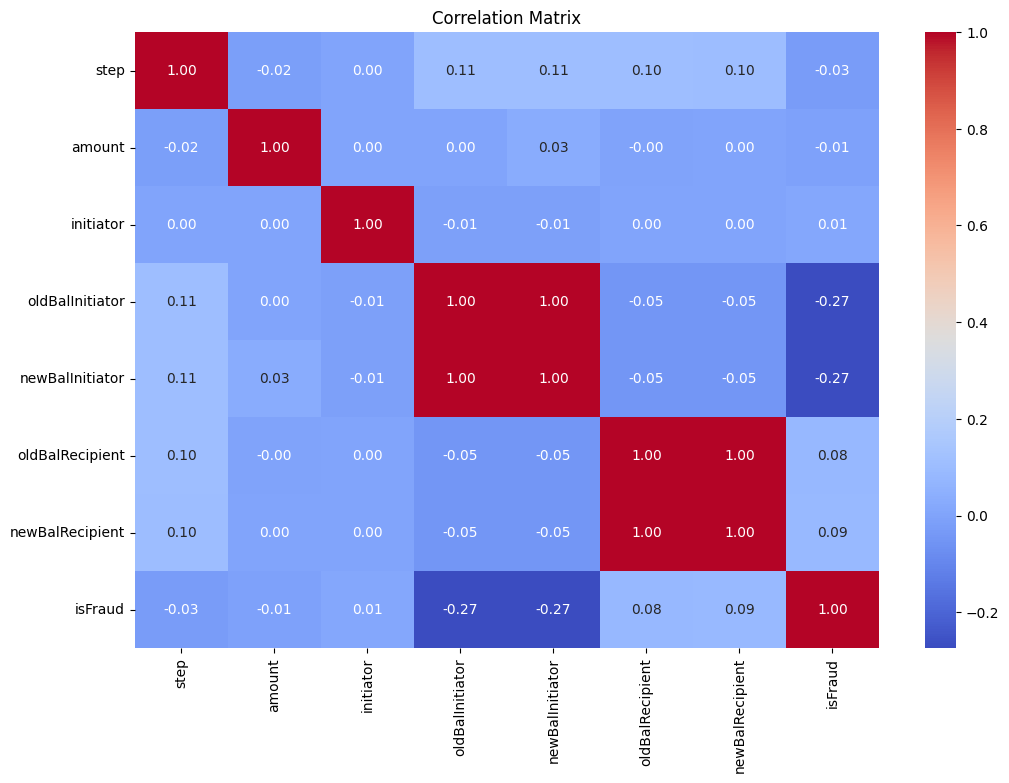

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# 11. Calculate and interpret correlation matrices for numerical features

In [ ]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation
correlation_matrix = numeric_df.corr()

# Display highly correlated features with 'isFraud'
print(correlation_matrix["isFraud"].sort_values(ascending=False))


isFraud            1.000000
newBalRecipient    0.085448
oldBalRecipient    0.083864
initiator          0.011921
amount            -0.007688
step              -0.028868
oldBalInitiator   -0.273515
newBalInitiator   -0.273952
Name: isFraud, dtype: float64


# 12. Provide statistical summaries of the data

In [ ]:
# Summarize the dataset
print(df.describe())

# Summarize fraud and non-fraud transactions separately
print("Fraudulent Transactions:\n", df[df["isFraud"] == 1].describe())
print("Non-Fraudulent Transactions:\n", df[df["isFraud"] == 0].describe())


               step        amount     initiator  oldBalInitiator  \
count  4.225938e+06  4.225938e+06  4.225938e+06     4.225938e+06   
mean   9.811771e+01  5.302164e+04  4.495007e+15     2.246066e+07   
std    5.573714e+01  2.708200e+06  2.912521e+14     6.418517e+07   
min    0.000000e+00  0.000000e+00  4.000000e+15    -1.999926e+05   
25%    5.000000e+01  9.444000e+01  4.237993e+15     4.681000e+01   
50%    9.900000e+01  5.966900e+02  4.491575e+15     3.655555e+03   
75%    1.470000e+02  1.708469e+04  4.747260e+15     2.344125e+05   
max    1.920000e+02  7.654805e+08  5.000000e+15     6.409231e+08   

       newBalInitiator  oldBalRecipient  newBalRecipient       isFraud  
count     4.225938e+06     4.225938e+06     4.225938e+06  4.225938e+06  
mean      2.246537e+07     1.685001e+06     1.703962e+06  5.284313e-01  
std       6.421574e+07     6.795758e+06     6.802135e+06  4.991911e-01  
min      -1.999926e+05    -7.477966e+04     0.000000e+00  0.000000e+00  
25%       0.000000e+00

# Part 2: Data Preprocessing and Dataset Splitting

# 1. Implement data cleaning techniques based on your EDA findings

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (only for numeric columns)
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)

# Remove detected outliers using IQR method (only for numeric columns)
numeric_df = df.select_dtypes(include=["number"])  # Keep only numeric columns for IQR calculation

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Dataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (2622515, 10)


# 2. Apply appropriate encoding methods for categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = ["transactionType"]

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())


   step  transactionType  amount         initiator  oldBalInitiator  \
0     0                2  579.16  4018807983755588            29.32   
1     0                3   39.03  4610593854752035            39.03   
2     0                3   21.78  4840578447365454            21.78   
3     0                2  570.22  4958066799829630             5.29   
4     0                2  574.80  4149196095918843            82.63   

   newBalInitiator         recipient  oldBalRecipient  newBalRecipient  \
0            29.32        30-0000345             0.00             0.00   
1             0.00  4944921135715488            55.94            94.98   
2             0.00  4305579785620656            58.09            79.88   
3             5.29        00-0000388             0.00             0.00   
4            82.63        80-0005320             0.00             0.00   

   isFraud  
0        0  
1        1  
2        1  
3        0  
4        0  


# 3. Implement feature normalization techniques

(a) Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns for scaling
numeric_cols = df.select_dtypes(include=["number"]).columns

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()

# Apply MinMaxScaler only to numeric columns
df_scaled_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

print(df_scaled_minmax.head())


   step  transactionType    amount  initiator  oldBalInitiator  \
0   0.0             0.50  0.013605   0.018808         0.380033   
1   0.0             0.75  0.000917   0.610594         0.380058   
2   0.0             0.75  0.000512   0.840579         0.380014   
3   0.0             0.50  0.013395   0.958067         0.379972   
4   0.0             0.50  0.013503   0.149196         0.380168   

   newBalInitiator         recipient  oldBalRecipient  newBalRecipient  \
0         0.375021        30-0000345         0.000000         0.000000   
1         0.374931  4944921135715488         0.000011         0.000019   
2         0.374931  4305579785620656         0.000012         0.000016   
3         0.374947        00-0000388         0.000000         0.000000   
4         0.375185        80-0005320         0.000000         0.000000   

   isFraud  
0      0.0  
1      1.0  
2      1.0  
3      0.0  
4      0.0  


(b) Z-score Normalization (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns

scaler_zscore = StandardScaler()
df_scaled_zscore = df.copy()

# Apply StandardScaler only to numeric columns
df_scaled_zscore[numeric_cols] = scaler_zscore.fit_transform(df[numeric_cols])

print(df_scaled_zscore.head())


       step  transactionType    amount  initiator  oldBalInitiator  \
0 -1.600516        -1.123037 -0.436161  -1.641013        -0.324301   
1 -1.600516         0.889488 -0.495718   0.402971        -0.323937   
2 -1.600516         0.889488 -0.497620   1.197320        -0.324584   
3 -1.600516        -1.123037 -0.437147   1.603116        -0.325203   
4 -1.600516        -1.123037 -0.436642  -1.190662        -0.322301   

   newBalInitiator         recipient  oldBalRecipient  newBalRecipient  \
0        -0.269125        30-0000345        -0.700518        -0.701658   
1        -0.270321  4944921135715488        -0.700479        -0.701591   
2        -0.270321  4305579785620656        -0.700477        -0.701602   
3        -0.270105        00-0000388        -0.700518        -0.701658   
4        -0.266949        80-0005320        -0.700518        -0.701658   

    isFraud  
0 -1.117282  
1  0.895029  
2  0.895029  
3 -1.117282  
4 -1.117282  


# 4. Implement feature selection methods

(a) Correlation-based feature selection

In [ ]:
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation with target variable
corr_matrix = numeric_df.corr()
corr_with_target = corr_matrix["isFraud"].abs().sort_values(ascending=False)

# Select features with correlation above threshold (e.g., 0.1)
selected_features = corr_with_target[corr_with_target > 0.1].index.tolist()

print("Selected Features based on Correlation:", selected_features)


Selected Features based on Correlation: ['isFraud', 'transactionType', 'newBalRecipient', 'oldBalRecipient', 'amount']


# 5. Dataset Splitting

(a) Random Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[selected_features].drop(columns=["isFraud"])  # Drop target variable
y = df["isFraud"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (2098012, 4) (2098012,)
Testing Set Shape: (524503, 4) (524503,)


(b) Choosing the best splitting approach

In [ ]:
# Trying stratified sampling
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Checking class distribution
print("Class distribution in original dataset:", y.value_counts(normalize=True))
print("Class distribution in stratified training set:", y_train_strat.value_counts(normalize=True))
print("Class distribution in stratified testing set:", y_test_strat.value_counts(normalize=True))


Class distribution in original dataset: isFraud
1    0.555223
0    0.444777
Name: proportion, dtype: float64
Class distribution in stratified training set: isFraud
1    0.555223
0    0.444777
Name: proportion, dtype: float64
Class distribution in stratified testing set: isFraud
1    0.555223
0    0.444777
Name: proportion, dtype: float64


# Part 3: Model Implementation

# 1. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Function to train and evaluate KNN with different distance metrics
def evaluate_knn(metric):
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    start_time = time.time()
    knn.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"KNN ({metric} distance) - Accuracy: {accuracy:.4f}, Training Time: {training_time:.4f}s")

# Evaluate KNN with different distance metrics
for metric in ["euclidean", "manhattan", "minkowski"]:
    evaluate_knn(metric)


KNN (euclidean distance) - Accuracy: 0.9947, Training Time: 0.8933s
KNN (manhattan distance) - Accuracy: 0.9947, Training Time: 0.8924s
KNN (minkowski distance) - Accuracy: 0.9947, Training Time: 0.8830s


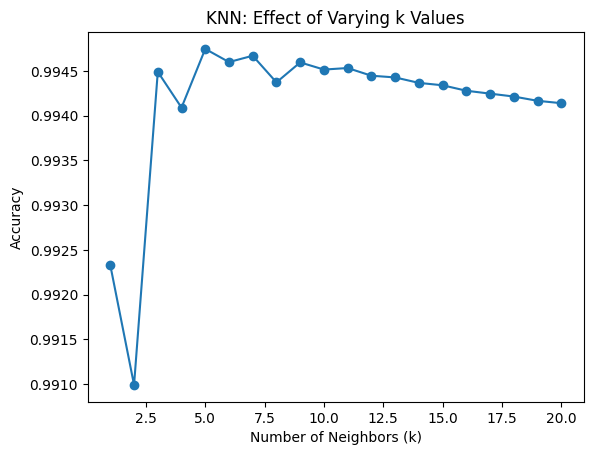

In [ ]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: Effect of Varying k Values")
plt.show()


# 2. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Reduce dataset size (optional)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=5000, random_state=42, stratify=y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

kernels = ["linear", "rbf", "poly"]

for kernel in kernels:
    if kernel == "linear":
        svm = LinearSVC(max_iter=1000, dual=False)  # Faster linear SVM
    else:
        svm = SVC(kernel=kernel, max_iter=1000)  # Set max iterations to prevent long training

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM ({kernel} kernel) - Accuracy: {accuracy:.4f}")


SVM (linear kernel) - Accuracy: 0.5550
SVM (rbf kernel) - Accuracy: 0.7830
SVM (poly kernel) - Accuracy: 0.5480


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
C_values = [0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel="rbf", C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM (C={C}) - Accuracy: {accuracy:.4f}")


SVM (C=0.1) - Accuracy: 0.7700
SVM (C=1) - Accuracy: 0.7820
SVM (C=10) - Accuracy: 0.9000
SVM (C=100) - Accuracy: 0.9200


# 3. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Tune Decision Tree hyperparameters
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree - Accuracy: {accuracy:.4f}")


Decision Tree - Accuracy: 0.9970


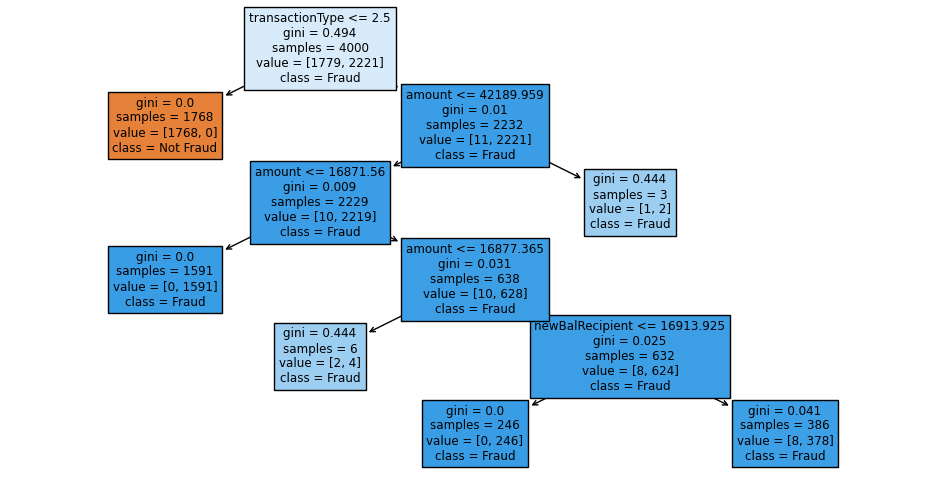

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=list(X_train.columns), class_names=["Not Fraud", "Fraud"], filled=True)
plt.show()


# 4. Regression for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.5550


In [ ]:
for penalty in ["l1", "l2"]:
    logreg = LogisticRegression(penalty=penalty, solver="liblinear")
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Logistic Regression ({penalty} regularization) - Accuracy: {accuracy:.4f}")


Logistic Regression (l1 regularization) - Accuracy: 0.9970
Logistic Regression (l2 regularization) - Accuracy: 0.5550


# Part 4: Model Evaluation and Comparison

# 1. Implement a comprehensive evaluation framework

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate each model
evaluate_model(knn, "KNN")





KNN Performance:
Accuracy: 0.9950
Precision: 0.9928
Recall: 0.9982
F1-score: 0.9955

Confusion Matrix:
[[441   4]
 [  1 554]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       445
           1       0.99      1.00      1.00       555

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



In [ ]:
evaluate_model(svm, "SVM")


SVM Performance:
Accuracy: 0.9200
Precision: 0.9917
Recall: 0.8631
F1-score: 0.9229

Confusion Matrix:
[[441   4]
 [ 76 479]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       445
           1       0.99      0.86      0.92       555

    accuracy                           0.92      1000
   macro avg       0.92      0.93      0.92      1000
weighted avg       0.93      0.92      0.92      1000



In [ ]:
evaluate_model(tree, "Decision Tree")



Decision Tree Performance:
Accuracy: 0.9970
Precision: 0.9946
Recall: 1.0000
F1-score: 0.9973

Confusion Matrix:
[[442   3]
 [  0 555]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       445
           1       0.99      1.00      1.00       555

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
evaluate_model(logreg, "Logistic Regression")


Logistic Regression Performance:
Accuracy: 0.5550
Precision: 0.5550
Recall: 1.0000
F1-score: 0.7138

Confusion Matrix:
[[  0 445]
 [  0 555]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       445
           1       0.56      1.00      0.71       555

    accuracy                           0.56      1000
   macro avg       0.28      0.50      0.36      1000
weighted avg       0.31      0.56      0.40      1000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# 2. Analyze the performance of each model on imbalanced classe

In [ ]:
# Check class distribution in predictions
import numpy as np

for model, name in [(knn, "KNN"), (svm, "SVM"), (tree, "Decision Tree"), (logreg, "Logistic Regression")]:
    y_pred = model.predict(X_test)
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"\n{name} Prediction Distribution: {dict(zip(unique, counts))}")



KNN Prediction Distribution: {0: 442, 1: 558}

SVM Prediction Distribution: {0: 517, 1: 483}

Decision Tree Prediction Distribution: {0: 442, 1: 558}

Logistic Regression Prediction Distribution: {1: 1000}


# 3. Compare the computational efficiency of each mode

In [ ]:
import time

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    model.predict(X_test)
    prediction_time = time.time() - start_time

    print(f"{name} - Training Time: {training_time:.4f}s, Prediction Time: {prediction_time:.4f}s")


KNN - Training Time: 0.0184s, Prediction Time: 0.0198s
SVM - Training Time: 0.1149s, Prediction Time: 0.0589s
Decision Tree - Training Time: 0.0059s, Prediction Time: 0.0005s
Logistic Regression - Training Time: 0.0280s, Prediction Time: 0.0005s


# 4. Determine which models perform best for which classes

In [ ]:
# Compare F1-score of each model
model_f1_scores = {}

for model, name in [(knn, "KNN"), (svm, "SVM"), (tree, "Decision Tree"), (logreg, "Logistic Regression")]:
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    model_f1_scores[name] = f1

best_model = max(model_f1_scores, key=model_f1_scores.get)
print(f"Best performing model based on F1-score: {best_model}")


Best performing model based on F1-score: Decision Tree


In [ ]:
from sklearn.metrics import f1_score

model_f1_scores = {}

for model, name in [(knn, "KNN"), (svm, "SVM"), (tree, "Decision Tree"), (logreg, "Logistic Regression")]:
    y_pred = model.predict(X_test)

    # Compute F1-score separately for each class
    f1_not_fraud = f1_score(y_test, y_pred, pos_label=0)  # Class 0 (Not Fraud)
    f1_fraud = f1_score(y_test, y_pred, pos_label=1)  # Class 1 (Fraud)

    model_f1_scores[name] = {
        "F1-score Not Fraud (0)": f1_not_fraud,
        "F1-score Fraud (1)": f1_fraud,
        "Average F1-score": f1_score(y_test, y_pred)  # Macro F1-score
    }

# Print F1-scores for each model
for model, scores in model_f1_scores.items():
    print(f"\n{model}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")

# Identify best models for each class
best_f1_not_fraud = max(model_f1_scores, key=lambda x: model_f1_scores[x]["F1-score Not Fraud (0)"])
best_f1_fraud = max(model_f1_scores, key=lambda x: model_f1_scores[x]["F1-score Fraud (1)"])
best_f1_avg = max(model_f1_scores, key=lambda x: model_f1_scores[x]["Average F1-score"])

print(f"\nBest model for 'Not Fraud' (Class 0): {best_f1_not_fraud}")
print(f"Best model for 'Fraud' (Class 1): {best_f1_fraud}")
print(f"Best overall model (Avg F1-score): {best_f1_avg}")



KNN:
F1-score Not Fraud (0): 0.9944
F1-score Fraud (1): 0.9955
Average F1-score: 0.9955

SVM:
F1-score Not Fraud (0): 0.9168
F1-score Fraud (1): 0.9229
Average F1-score: 0.9229

Decision Tree:
F1-score Not Fraud (0): 0.9966
F1-score Fraud (1): 0.9973
Average F1-score: 0.9973

Logistic Regression:
F1-score Not Fraud (0): 0.0000
F1-score Fraud (1): 0.7138
Average F1-score: 0.7138

Best model for 'Not Fraud' (Class 0): Decision Tree
Best model for 'Fraud' (Class 1): Decision Tree
Best overall model (Avg F1-score): Decision Tree
